In [29]:
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv('C:/Users/priya/Documents/VScode/Delhivery Logistics Optimization/delhivery.csv')

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [32]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

source_name         293
destination_name    261
dtype: int64


In [33]:
# Correct data types
df['route_type'] = df['route_type'].astype('category')  # Categorical

# Verify data types
print(df.dtypes)


data                                object
trip_creation_time                  object
route_schedule_uuid                 object
route_type                        category
trip_uuid                           object
source_center                       object
source_name                         object
destination_center                  object
destination_name                    object
od_start_time                       object
od_end_time                         object
start_scan_to_end_scan             float64
is_cutoff                             bool
cutoff_factor                        int64
cutoff_timestamp                    object
actual_distance_to_destination     float64
actual_time                        float64
osrm_time                          float64
osrm_distance                      float64
factor                             float64
segment_actual_time                float64
segment_osrm_time                  float64
segment_osrm_distance              float64
segment_fac

In [34]:
# Define the specific columns to handle
column_1 = 'source_name'
column_2 = 'destination_name'
     

#Droping rows where both columns have null values
df.dropna(subset=[column_1, column_2], how='all', inplace=True)
     

#Filling missing values in each column individually
df[column_1].fillna('missing', inplace=True)
df[column_2].fillna('missing', inplace=True)

In [35]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [36]:
#If no non-integer values, convert the float columns to int
df['actual_time'] = df['actual_time'].astype(int)
df['osrm_time'] = df['osrm_time'].astype(int)
df['segment_actual_time'] = df['segment_actual_time'].astype(int)
df['segment_osrm_time'] = df['segment_osrm_time'].astype(int)

In [37]:
# Defining the columns to convert to datetime
date_columns = ['trip_creation_time', 'od_start_time', 'od_end_time','cutoff_timestamp']
     

# Converting each column to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
     

# Check the data types to confirm conversion
print("Data Types After Conversion:")
print(df.dtypes)

Data Types After Conversion:
data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                                int32
osrm_time                                  int32
osrm_distance                            float64
factor                                  

In [38]:
# Calculate time difference between trip creation and start
df['time_to_start'] = (df['od_start_time'] - df['trip_creation_time']).dt.total_seconds() /60
df['time_taken'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60
print(df.head())

       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_

In [39]:
df['hour_of_day']=df['trip_creation_time'].dt.hour
df['day_of_week']=df['trip_creation_time'].dt.day_name()
df['month_of_year']=df['trip_creation_time'].dt.month_name()

In [40]:
# Creating Trip Duration (in hours)
df['trip_duration'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
df['trip_duration']

0         1.436894
1         1.436894
2         1.436894
3         1.436894
4         1.436894
            ...   
144862    7.128106
144863    7.128106
144864    7.128106
144865    7.128106
144866    7.128106
Name: trip_duration, Length: 144864, dtype: float64

In [41]:
# Detect outliers in trip_duration (example using IQR)
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['trip_duration'] < (Q1 - 1.5 * IQR)) | (df['trip_duration'] > (Q3 + 1.5 * IQR))
     

# Flaging outliers for further investigation
df['trip_duration_outlier'] = np.where(outlier_condition, 'Yes', 'No')
df['trip_duration_outlier']
     

0         No
1         No
2         No
3         No
4         No
          ..
144862    No
144863    No
144864    No
144865    No
144866    No
Name: trip_duration_outlier, Length: 144864, dtype: object

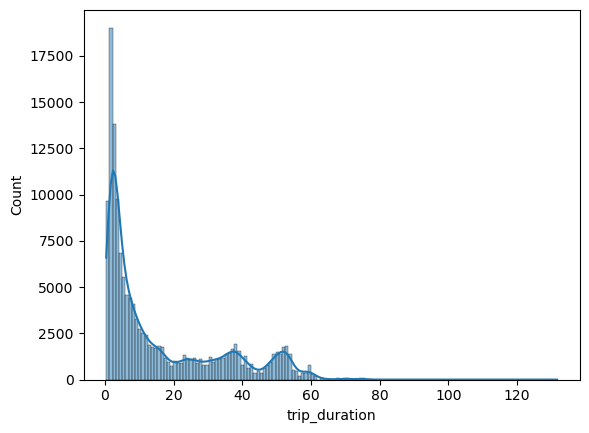

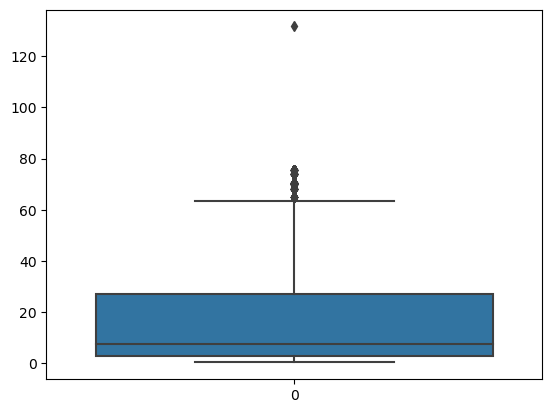

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram and Kernel Density Estimate (KDE) for a numerical column
sns.histplot(df['trip_duration'], kde=True)
plt.show()

# Boxplot for detecting outliers
sns.boxplot(df['trip_duration'])
plt.show()

### Univariate Data Analysis


<Axes: ylabel='route_type'>

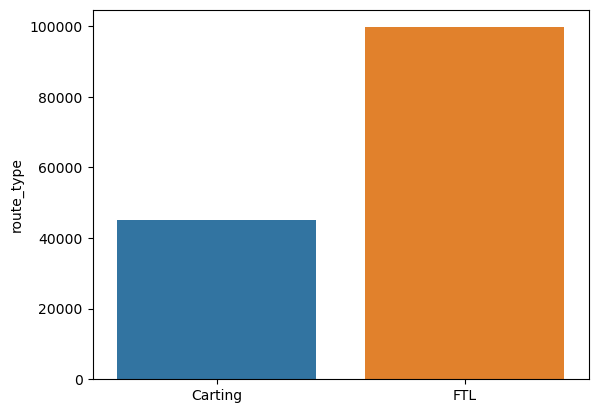

In [43]:
sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts())

Text(0.5, 1.0, 'Time taken to deliver from source to destination')

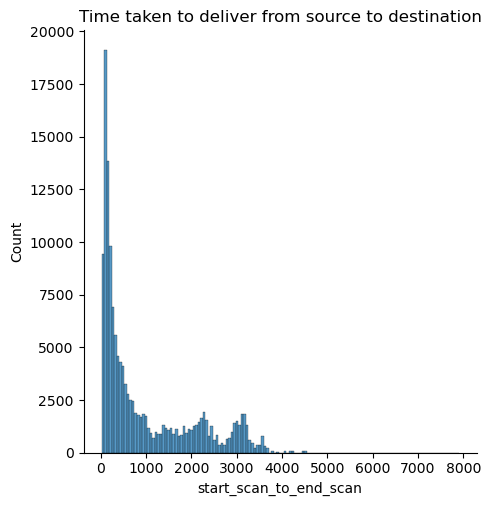

In [44]:
sns.displot(df['start_scan_to_end_scan'])
plt.title('Time taken to deliver from source to destination')

### Bivariate Data Analysis:

<Axes: xlabel='hour_of_day', ylabel='count'>

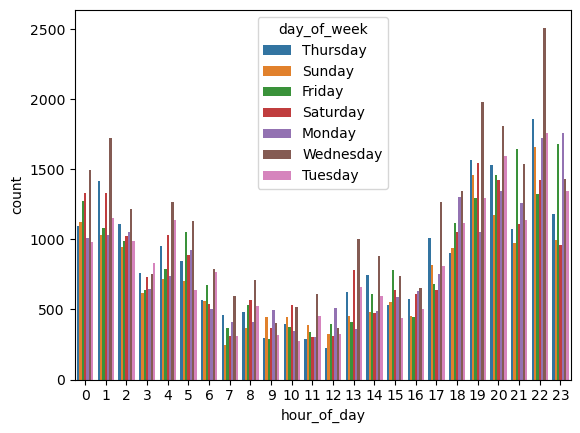

In [45]:
sns.countplot(hue=df['day_of_week'],x=df['hour_of_day'])

In [46]:
# Extract city ,code and state from destination_name
df[['destination','destination_state']] = df['destination_name'].str.split('(', n=1, expand=True)
df['destination_state'] = df['destination_state'].str.rstrip(')')
df[['destination_City','destination_place','destination_code']] = df['destination'].str.split('_', n=2, expand=True)
     

# Extract city ,code and state from source_name
df[['source','source_state']] = df['source_name'].str.split('(', n=1, expand=True)
df['source_state'] = df['source_state'].str.rstrip(')')
df[['source_City','source_place','source_code']] = df['source'].str.split('_', n=2, expand=True)

# Verify the updated DataFrame
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,destination,destination_state,destination_City,destination_place,destination_code,source,source_state,source_City,source_place,source_code
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Anand_VUNagar_DC,Gujarat,Anand,VUNagar,DC
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Anand_VUNagar_DC,Gujarat,Anand,VUNagar,DC
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Anand_VUNagar_DC,Gujarat,Anand,VUNagar,DC
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Anand_VUNagar_DC,Gujarat,Anand,VUNagar,DC
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat_MotvdDPP_D,Gujarat,Khambhat,MotvdDPP,D,Anand_VUNagar_DC,Gujarat,Anand,VUNagar,DC


**Top  Indian states with most product delivery sources**

Text(0.5, 1.0, 'Top Indian states with most product delivery sources')

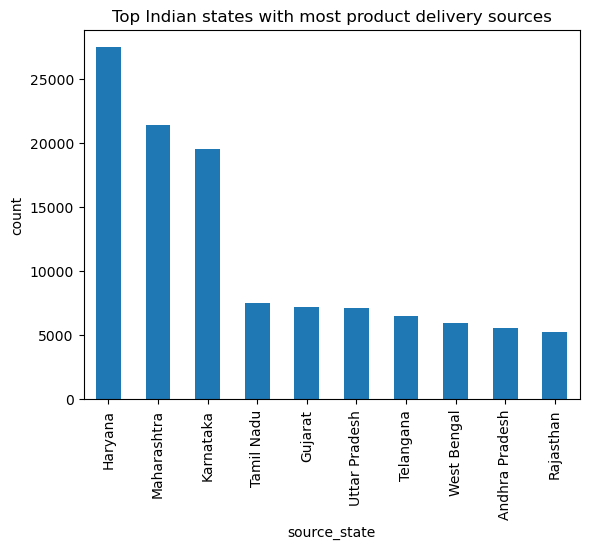

In [47]:
df.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar' )
plt.xlabel('source_state')
plt.ylabel('count')
plt.title('Top Indian states with most product delivery sources')

**Top  Indian  destination with most product delivery sources**

Text(0.5, 1.0, 'Top Indian states with most product delivery sources')

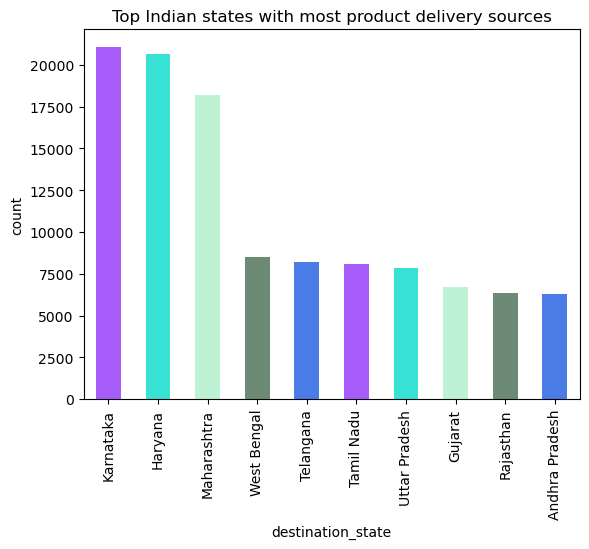

In [48]:
color_sequences = ['#A85CF9','#37E2D5','#BDF2D5','#6D8B74','#4B7BE5']
df.groupby('destination_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=color_sequences )
plt.xlabel('destination_state')
plt.ylabel('count')
plt.title('Top Indian states with most product delivery sources')

**Destination places in each state**

Text(0, 0.5, 'count')

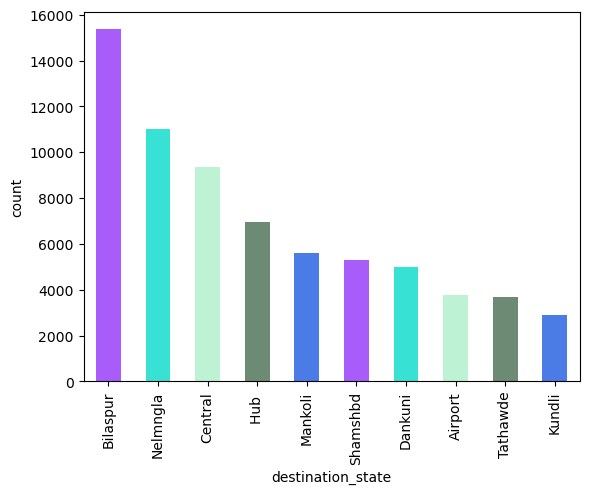

In [49]:
df.groupby('destination_place')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar',color=color_sequences )
plt.xlabel('destination_state')
plt.ylabel('count')

Text(0.5, 1.0, 'Source places in each state')

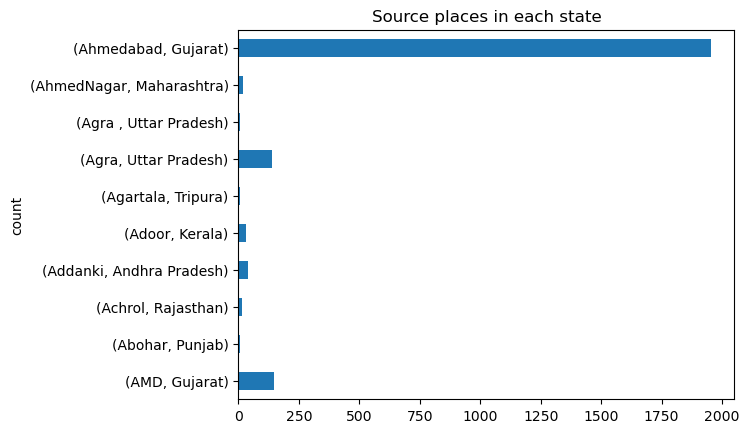

In [50]:
df.groupby(['destination_City','destination_state'])['trip_uuid'].count().head(10).plot(kind='barh')
plt.ylabel('count')
plt.title('Source places in each state')

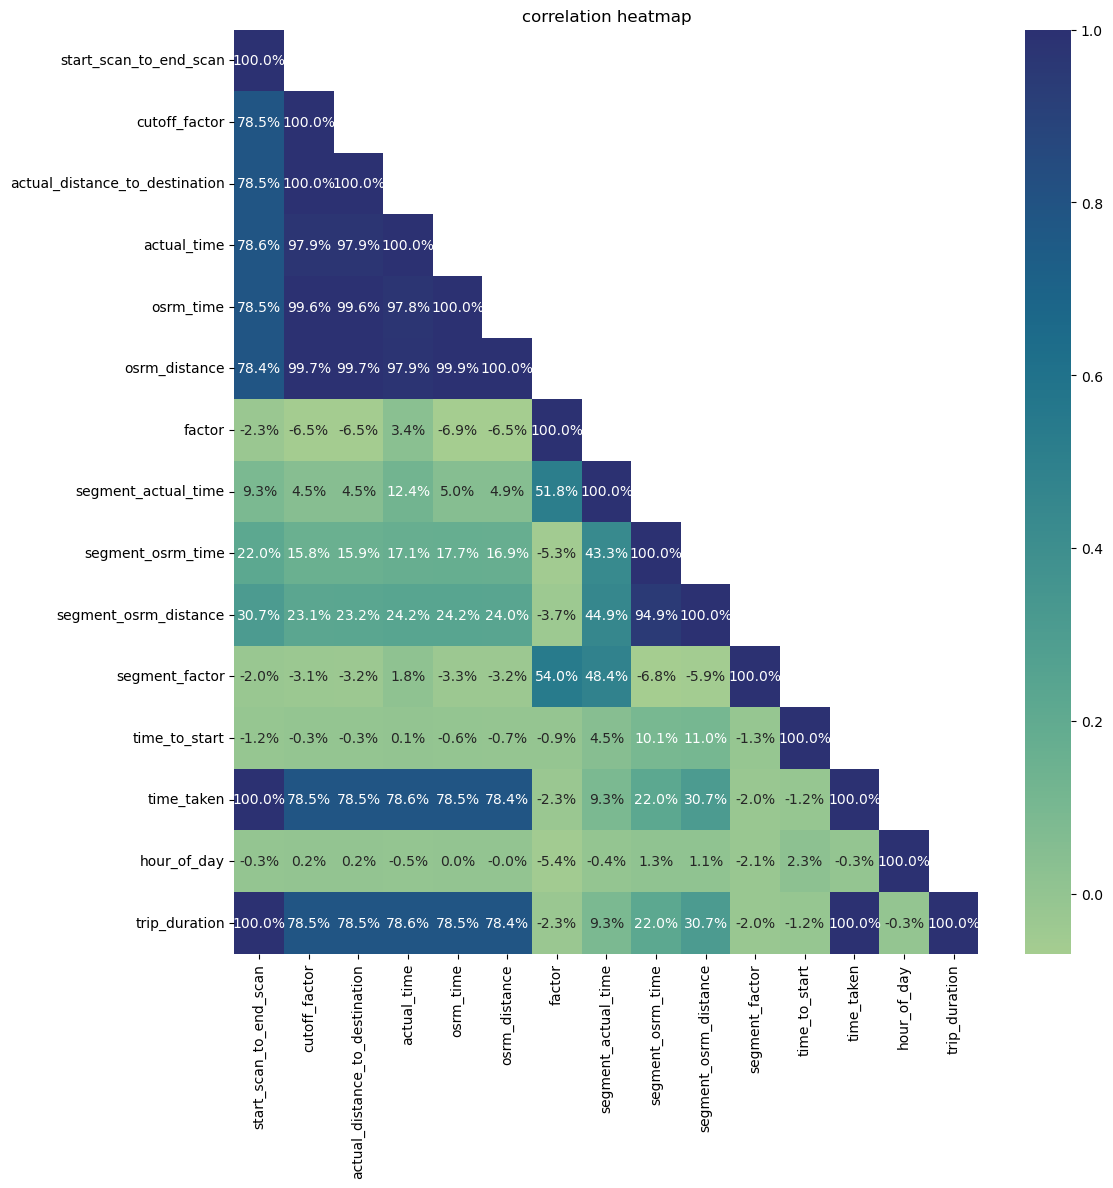

In [51]:
numeric_data = df.select_dtypes(include=['number'])
Correlation = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(Correlation, annot=True, cmap='crest', mask=np.triu(Correlation, +1), fmt="0.0001%")
plt.title('correlation heatmap')
plt.show()